<a href="https://colab.research.google.com/github/adejokeowoso/logistic-reg/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import DataSet

In [3]:
df= pd.read_csv("/content/titanic-passengers.csv",delimiter=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


Finding the number of Missing Values on each column

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Replacing Missing Numerical Values of the "Age" Feature

In [7]:
df["Age"].fillna(df["Age"].mean(), inplace= True)
df.isnull().sum().sum()

689

Number of Elements per Category of the "Cabin" Feature

In [8]:
print(df["Cabin"].value_counts())

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
D              3
              ..
A31            1
T              1
A6             1
C54            1
B39            1
Name: Cabin, Length: 147, dtype: int64


Replacing Missing Categorical Values of the "Cabin" Feature

In [9]:
df["Cabin"].fillna("G6", inplace= True)

Number of Elements per Category of the "Embarked" Feature

In [10]:
print(df["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


Replacing Missing Categorical Values of the "Embarked" Feature

In [11]:
df["Embarked"].fillna("S", inplace= True)

Visualization Phase

Distribution of the most important features
"Age" Feature Distribution


# This is formatted as code
```



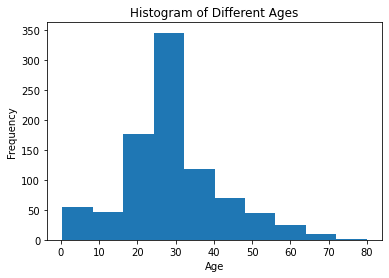

In [12]:
plt.title ("Histogram of Different Ages")
plt.xlabel("Age")
df["Age"].plot.hist()

"Sex" Feature Distribution

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

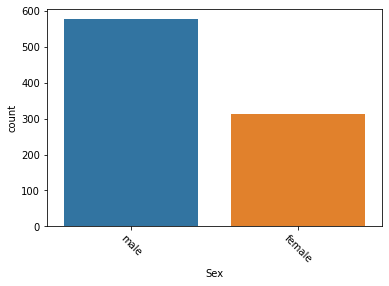

In [15]:
sns.countplot(x= "Sex", data= df)
plt.xticks(rotation=-45)

"Pclass" Feature Distribution

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

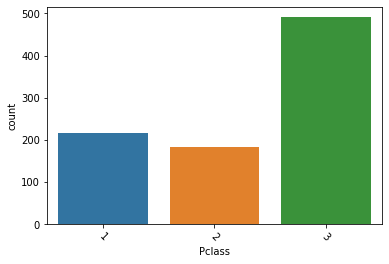

In [16]:
sns.countplot(x= "Pclass", data= df)
plt.xticks(rotation=-45)

"Embarked" Feature Distribution

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

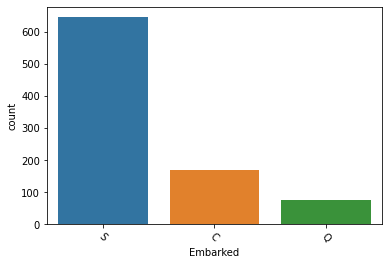

In [17]:
sns.countplot(x= "Embarked",data= df)
plt.xticks(rotation=-45)

Correlation between "Sex" and "Age"

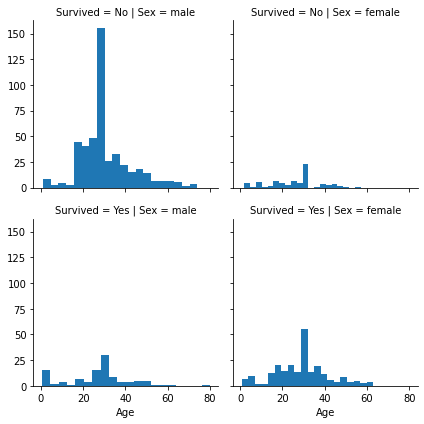

In [18]:
g=sns.FacetGrid(df, row= "Survived", col="Sex")
g.map(plt.hist, "Age", bins=20)

Correlation between "Pclass" and "Embarked"

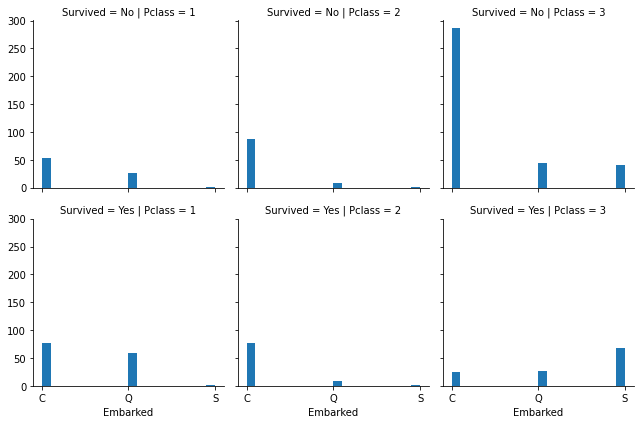

In [19]:
grid=sns.FacetGrid(df, row= "Survived", col="Pclass")
grid.map(plt.hist, "Embarked", bins=20)

Correlation Heatmap

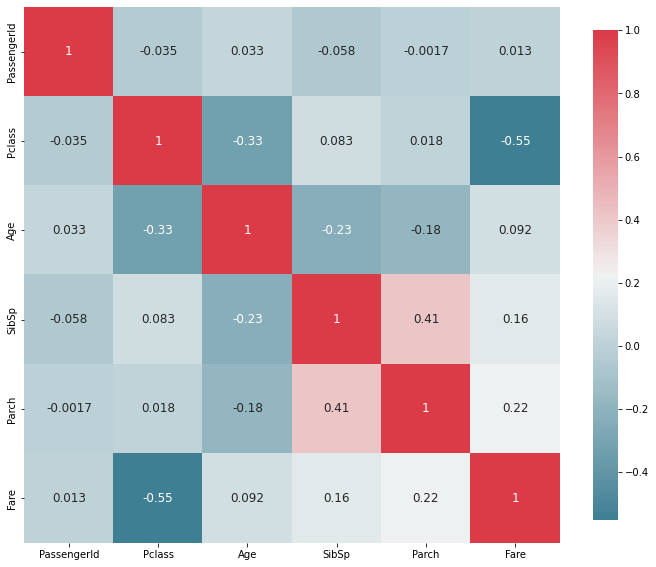

In [20]:

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }
        
    )

plot_correlation_map(df)

Correlation grouby between "Pclass" and "Survived"

In [21]:
cleanup= {"Survived": {"No":0,"Yes":1}}
df.replace(cleanup, inplace=True)
df[["Pclass","Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Drop useless columns

In [22]:
new_data= df.copy()
new_data= new_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,male,28.0,0,0,13.0000,S
1,0,3,male,25.0,0,0,7.6500,S
2,0,3,male,20.0,0,0,7.8542,S
3,0,3,female,29.0,0,4,21.0750,S
4,0,1,male,31.0,1,0,52.0000,S


Create a new column "Title"

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['Survived']=encoder.fit_transform(df['Survived'])


df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [26]:
x=df[["Age", "Sex"]]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

In [27]:
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.77


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


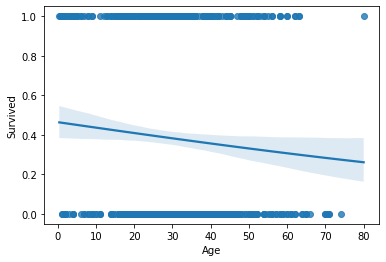

In [28]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=df,logistic=True)

In [29]:
#confusion matrix to validate your model. 
confusion_matrix=pd.crosstab(y_test,y_pred, rownames=['Actual'],colnames=['Predicted'])
print(confusion_matrix)

Predicted    0   1
Actual            
0          156  33
1           38  85


In [30]:
Recall=156/(156+38)
Recall

0.8041237113402062

In [31]:
TFP=33/(33+85)
TFP

0.2796610169491525